<a href="https://colab.research.google.com/github/annamariabugaj/ML_small_projects/blob/main/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST handwritten digits dataset



*   600.000 training images (digits 0-9)
*   10.000 test images



1.   First we approach with a standard neural network (ANN)
2.   Next we try with 







In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# MNIST IMAGE --> Tensors
transform = transforms.ToTensor()

# import images from trochvision

train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 148455522.11it/s]


Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 6089668.90it/s]


Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42543623.26it/s]

Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 9007342.21it/s]


Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



In [3]:
train_data


Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [6]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
type(train_data[0])

tuple

In [8]:
image, label = train_data[0]

In [9]:
image.shape

torch.Size([1, 28, 28])

In [10]:
label

5

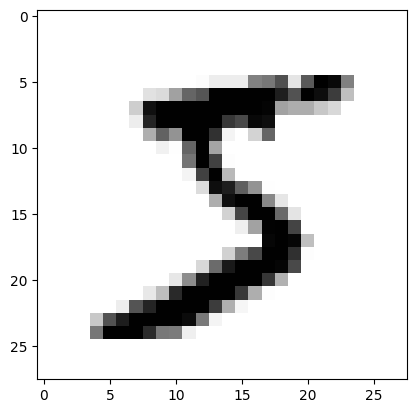

In [14]:
plt.imshow(image.reshape((28,28)), cmap='gist_yarg') 

In [15]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [17]:
from torchvision.utils import make_grid

np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))


In [18]:
# FIRST BATCH

for images, labels in train_loader:
  break


In [19]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [20]:
images.shape

torch.Size([100, 1, 28, 28])

In [21]:
labels.shape

torch.Size([100])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


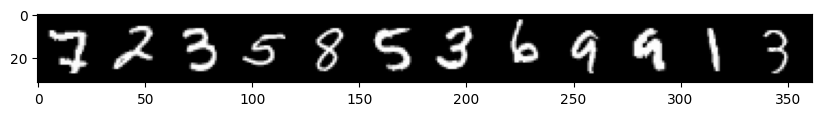

In [22]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())
# Print the first 12 images
im = make_grid(images[:12], nrow=12) # the dafault row is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

Creating the Neural Network

In [26]:
class MultilayerPerceptron(nn.Module):
  def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
    super().__init__()
    self.fc1 = nn.Linear(in_sz, layers[0])
    self.fc2 = nn.Linear(layers[0], layers[1])
    self.fc3 = nn.Linear(layers[1], out_sz)

  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X,dim=1) # Multiclass classification

In [27]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [28]:
# ANN --> CNN

for param in model.parameters():
  print(param.numel())

94080
120
10080
84
840
10


In [29]:
 # 105214 total parameters !!! 

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [32]:
images.shape # ----> [100,784] flatten out

torch.Size([100, 1, 28, 28])

In [34]:
images.view(100,-1).shape # -1 combine to one single dimension

torch.Size([100, 784])

In [36]:
import time
start_time = time.time()

# TRAINING

epochs = 10

# TRACKERS
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1
    # 10 Neurons
    # [0.1, 0.0, ......0.8] ----> 9
    y_pred = model(X_train.view(100, -1))
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data, 1)[1] 
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%200 == 0:
      acc = trn_corr.item()*100/(100*b)
      print(f'Epoch {i} batch{b} loss: {loss.item()} accuracy : {acc}')

  train_losses.append(loss.item())
  train_correct.append(trn_corr.item())

  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test.view(500, -1))
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()
  
  # Update test loss & accuracy for the epoch
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



total_time = time.time() - start_time
print(f"Duration: {total_time/60} minutes")

Epoch 0 batch200 loss: 0.24467909336090088 accuracy : 94.805
Epoch 0 batch400 loss: 0.14542999863624573 accuracy : 95.0625
Epoch 0 batch600 loss: 0.07299500703811646 accuracy : 95.35666666666667
Epoch 1 batch200 loss: 0.08716943860054016 accuracy : 96.5
Epoch 1 batch400 loss: 0.0669819787144661 accuracy : 96.595
Epoch 1 batch600 loss: 0.0688866600394249 accuracy : 96.67833333333333
Epoch 2 batch200 loss: 0.11654192209243774 accuracy : 97.67
Epoch 2 batch400 loss: 0.0588822178542614 accuracy : 97.4975
Epoch 2 batch600 loss: 0.03282598406076431 accuracy : 97.51333333333334
Epoch 3 batch200 loss: 0.11771348863840103 accuracy : 98.185
Epoch 3 batch400 loss: 0.045562487095594406 accuracy : 98.03
Epoch 3 batch600 loss: 0.04847530275583267 accuracy : 98.02833333333334
Epoch 4 batch200 loss: 0.008836661465466022 accuracy : 98.395
Epoch 4 batch400 loss: 0.03530832380056381 accuracy : 98.505
Epoch 4 batch600 loss: 0.05088510364294052 accuracy : 98.42166666666667
Epoch 5 batch200 loss: 0.04278699

EVALUATION

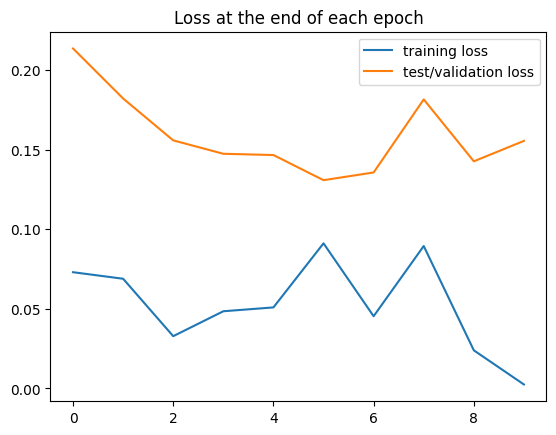

In [38]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='test/validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

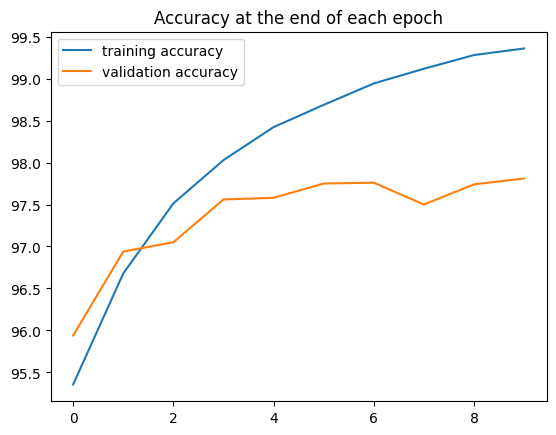

In [39]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [40]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(9594), tensor(9694), tensor(9705), tensor(9756), tensor(9758), tensor(9775), tensor(9776), tensor(9750), tensor(9774), tensor(9781)]

Test accuracy: 97.810%


In [42]:
# NEW UNSEEN DATA

test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)
with torch.no_grad():
  correct = 0

  for X_test, y_test in test_load_all:
    y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9781/10000 =  97.810%


In [44]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 970,    0,    1,    0,    0,    1,    6,    0,    2,    1],
       [   0, 1128,    0,    0,    0,    0,    3,    3,    1,    2],
       [   1,    3, 1012,    1,    2,    0,    3,    6,    6,    0],
       [   1,    1,    3,  989,    0,   10,    1,    1,   11,    2],
       [   1,    0,    2,    0,  961,    2,    7,    1,    2,    8],
       [   3,    0,    0,   10,    1,  872,   20,    0,    6,    3],
       [   0,    1,    1,    0,    4,    0,  918,    0,    1,    0],
       [   1,    1,    8,    5,    2,    1,    0, 1011,    7,    5],
       [   1,    1,    4,    3,    0,    5,    0,    0,  935,    3],
       [   2,    0,    1,    2,   12,    1,    0,    6,    3,  985]])